In [1]:
import pandas as pd
import numpy as np

## The Pandas Series Object


In [18]:
data = pd.Series([6,34,2,123,1])
data

0      6
1     34
2      2
3    123
4      1
dtype: int64

In [5]:
data.values

array([  6,  34,   2, 123,   1])

In [6]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [7]:
#data can be accessed by the associated index

data[0],data[3]

(6, 123)

In [8]:
#Pandas Series has an explicitly defined index associated with the values.

data = pd.Series([3,1,5.3,11,63],index=['a','b','c','d','e'])
data

a     3.0
b     1.0
c     5.3
d    11.0
e    63.0
dtype: float64

In [10]:
# We can even use noncontiguous or nonsequential indices:
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [11]:
# we can construct pandas series from python dictionary

population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [13]:
# also supports operations like array
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [14]:
# data can be a scalar, which is repeated to fill the specified index:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3,2])

3    c
2    a
dtype: object

### Data Selection in Series

**Explicit Indexing**: Index that we give while initializing Series, it can be anything fpr e.g. a,b,c.. or i,ii,iii,iv,... <br>
**Implicit Indexing**: Index that python assigns to each value in series, it always starts with 0  

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

In [11]:
# we can add data in Series as follow
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [12]:
# Pandas Series also supports slices, masking, and fancy indexing

# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [13]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [14]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [15]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, iloc, and ix


These slicing and indexing conventions can be a source of confusion. For example, if
your Series has an explicit integer index, an indexing operation such as data[1] will
use the explicit indices, while a slicing operation like data[1:3] will use the implicit
Python-style index.


In [16]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [17]:
# explicit index when indexing
data[1]

'a'

In [18]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides
some special indexer attributes that explicitly expose certain indexing schemes

In [20]:
# The loc attribute allows indexing and slicing that always references the explicit index
data.loc[1], data.loc[5]

('a', 'c')

In [21]:
# The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

data.iloc[1]

'b'

In [22]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Pandas Dataframe Object

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [19]:
population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [20]:
# Here we have a one-dimensional array with area, we also want to add population of each area, 
#it is not possible in Series

#we will use Dataframe that supports 2 dimension
states = pd.DataFrame({'population': population,
'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [21]:
states.index


Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [22]:
states.columns

Index(['population', 'area'], dtype='object')

In [23]:
#
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)


,a,b
0,0,0
1,1,2
2,2,4


In [24]:
# Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e.,“not a number”) values:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [25]:
# Dataframe can be created from 2D numpy arrays
pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c'])

,foo,bar
a,0.118620,0.946973
b,0.281930,0.038440
c,0.816876,0.664981


In [27]:
# dataframe from numpy structured array
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [28]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### Data Selection in Dataframe

In [23]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})

pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [24]:
data['area'],data.area # accessing columns, both gives same result

(California    423967
 Texas         695662
 New York      141297
 Florida       170312
 Illinois      149995
 Name: area, dtype: int64,
 California    423967
 Texas         695662
 New York      141297
 Florida       170312
 Illinois      149995
 Name: area, dtype: int64)

In [31]:
# accessing a row
data.values[0]

array([  423967, 38332521])

In [32]:
#  we can transpose the full DataFrame to swap rows and columns:
data.T

,California,Texas,New York,Florida,Illinois
area,423967,695662,141297,170312,149995
pop,38332521,26448193,19651127,19552860,12882135


In [33]:
# accessing data using iloc i.e implicit indexing
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [34]:
# using loc, i.e. using explicit indexing
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Any of the familiar NumPy-style data access patterns can be used within these indexers. 
For example, in the loc indexer we can combine masking and fancy indexing as in the following: 


In [36]:
data.loc[data.area > 400000, ['pop']]

,pop
California,38332521
Texas,26448193


In [42]:
# slicing
data[1:3]

,area,pop
Texas,695662,26448193
New York,141297,19651127


In [43]:
data['Florida':'Illinois']

,area,pop
Florida,170312,19552860
Illinois,149995,12882135


In [45]:
data[data.area > 400000]

,area,pop
California,423967,38332521
Texas,695662,26448193


## Pandas Index Object

In [2]:
# Index is immutable array, we cannot chnge values once initialized
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [3]:
# access elements as we do in array 
ind[1]

3

In [4]:
# if we try to change value of Index object it will throw error
ind[1] = 0

TypeError: Index does not support mutable operations

**The Index object follows many of the conventions used by Python’s built-in set data structure, so that unions, intersec‐tions, differences, and other combinations can be computed in a familiar way:**


In [5]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])


In [6]:
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [7]:
indA | indB # union


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [8]:
indA ^ indB # symmetric difference


Int64Index([1, 2, 9, 11], dtype='int64')

# Operating on Data in Pandas


### Ufuncs: Index Preservation


In [46]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [47]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),columns=['A', 'B', 'C', 'D'])
df


,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [48]:
# If we apply a NumPy ufunc on either of these objects, 
# the result will be another Pandas object with the indices preserved:

np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [49]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### Index alignment in Series

Here we seee that Alaska key is present in area and not in population, so we get a NaN value, similarly for New York

In [50]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')


In [51]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [52]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [53]:
# we can modify the fill value using appropriate object methods in place of the operators

A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index Alignment in Dataframe

In [57]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),columns=list('AB'))
A

,A,B
0,19,2
1,4,18


In [58]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),columns=list('BAC'))
B


,B,A,C
0,6,4,8
1,6,1,3
2,8,1,9


In [59]:
A + B

,A,B,C
0,23.0,8.0,NaN
1,5.0,24.0,NaN
2,NaN,NaN,NaN


In [60]:
# we can fill missing values in dataframe as :
A.add(B, fill_value=0)

,A,B,C
0,23.0,8.0,8.0
1,5.0,24.0,3.0
2,1.0,8.0,9.0


### Operations Between DataFrame and Series

In [3]:
rng = np.random.RandomState(42)
A = rng.randint(10, size=(3, 4))
A

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7]])

In [4]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,0,6,-5,2
2,1,1,-4,3


In [5]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 0,  6, -5,  2],
       [ 1,  1, -4,  3]])

# Handling Missing Data


Pandas uses sentinel approch to handle missing values.<br>
**What is sentinel approach?** <br>
In the sentinel approach, the sentinel value could be some data-specific convention,
such as indicating a missing integer value with –9999 or some rare bit pattern, or it
could be a more global convention, such as indicating a missing floating-point value
with NaN (Not a Number), a special value which is part of the IEEE floating-point
specification.
<br> <br>
Pandas uses sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point NaN value, and the Python None object.<br>

<br><br>**None: Pythonic missing data**
<br>
**Disadvantages of using None as sentinel values:**<br>
1.  None is a Python object, it cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type'object' (i.e., arrays of Python objects).
2.  more overhead
3.  if you perform aggregations like sum() or min() across an array with a None value, you will generally get an error

In [6]:
vals1 = np.array([1, None, 3, 4])
vals1 #dtype is object

array([1, None, 3, 4], dtype=object)

In [7]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()
# see time difference in calculation in dtype int and object

dtype = object
49.8 ms ± 345 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.17 ms ± 8.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



**NaN(acronym for Not a Number): Missing numerical data**
<br>**Advantages:**
1. NumPy chose a native floating-point type for this array,this array supports fast operations pushed into
compiled code.
<br>
**Disadvantages:**
1.  NaN is a bit like a data virus—it infects any other object it touches.

In [8]:
1 + np.nan

nan

In [9]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype


dtype('float64')

**Pandas automatically type-casts when NA values are present. For example, if we set a value in an integer array to np.nan, it will automatically be upcast to a floating-point type to accommodate the NA:**

In [10]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [12]:
x[0] = None #Pandas automatically converts the None to a NaN value.
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

#### Detecting null values

In [13]:
data = pd.Series([1,np.nan,6,None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [14]:
data[data.notnull()]

0    1.0
2    6.0
dtype: float64

#### Dropping Null values
<br>
Note: Dropping all NaN values is not a good practice

In [15]:
data.dropna() #drops all rows with NaN values

0    1.0
2    6.0
dtype: float64

In [16]:
df = pd.DataFrame([[1,np.nan, 2],[2,3,5],[np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [17]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [18]:
#  You can also specify how='all', which will only drop rows/columns that are all null values
df.dropna(axis='columns')

,2
0,2
1,5
2,6


#### Filling null values

In [19]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

Different methods for dilling NaN values are:
1. Fill with a single value, e.g. 0
2. Use forward-fill to propagate the previous values forward.
3. Use backward-fill to propagate next values backward

In [20]:
data.fillna(0) # single value

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [22]:
#forward fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [23]:
#backward fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

# MultiIndexing in pandas
<br>
we have population count of some country in 2000 nd 2010, we have to represt data with multi index, for eg (California,2000) has population 3242123

In [36]:
index = [('California', 2000), ('California', 2010),('New York', 2000), ('New York', 2010),('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,18976457, 19378102,20851820, 25145561]

In [37]:
# without pandas multindexing
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [38]:
# using pandas multi indexing
multi = pd.MultiIndex.from_tuples(index)
multi

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [39]:
pop = pop.reindex(multi)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [40]:
# with help of multi index it becomes very ewsy for us to access data
pop[:,2010] # all data of 2010

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [9]:
pop['New York'] # all years data for New York

2000    18976457
2010    19378102
dtype: int64

In [10]:
# we can convert above series in datframe format with use of unstack() 
pop.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [12]:
pop_df = pd.DataFrame({'total': pop,'under18':[9267089, 9284094,4687374, 4318033,5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

### Methods of multiIndex creation

In [3]:
df = pd.DataFrame(np.random.rand(4,2),index = [['a','a','b','b'],[1,2,1,2]],columns=['data1','data2'])
df

data1     data2
a 1  0.605821  0.861376
  2  0.000100  0.886550
b 1  0.544952  0.220194
  2  0.835560  0.940287

In [4]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}

pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

### Explicit MultiIndex constructors

In [5]:
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [6]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [7]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [8]:
# we can also name indexes
df.index.names = ['ind1','ind2']

In [9]:
df

data1     data2
ind1 ind2                    
a    1     0.605821  0.861376
     2     0.000100  0.886550
b    1     0.544952  0.220194
     2     0.835560  0.940287

#### multiIndex for columns

In [10]:
index = pd.MultiIndex.from_product([[2013,2014],[1,2]],names=['year','visit'])
columns = pd.MultiIndex.from_product([['BOB','GUIDO','SUE'],['TEMP','HR']])

In [12]:
data = np.round(np.random.randn(4,6),1)
data[:, ::2] *= 10
data += 37

In [15]:
# creating df
df = pd.DataFrame(data,index=index,columns=columns)
df

BOB       GUIDO         SUE      
            TEMP    HR  TEMP    HR  TEMP    HR
year visit                                    
2013 1      28.0  36.2  34.0  35.7  37.0  35.8
     2      49.0  38.8  49.0  37.5  32.0  36.9
2014 1      44.0  37.1  27.0  36.4  30.0  37.3
     2      33.0  36.9  41.0  37.1  37.0  37.7

#### Indexing Dataframe with multiple index of columns and rows


In [19]:
df['GUIDO','HR']

year  visit
2013  1        35.7
      2        37.5
2014  1        36.4
      2        37.1
Name: (GUIDO, HR), dtype: float64

In [21]:
df.iloc[:2,:3]

BOB       GUIDO
            TEMP    HR  TEMP
year visit                  
2013 1      28.0  36.2  34.0
     2      49.0  38.8  49.0

In [24]:
df.loc[:,('BOB','TEMP')]

year  visit
2013  1        28.0
      2        49.0
2014  1        44.0
      2        33.0
Name: (BOB, TEMP), dtype: float64

In [25]:
df.loc[2013,('BOB','TEMP')]

visit
1    28.0
2    49.0
Name: (BOB, TEMP), dtype: float64

In [26]:
df.loc[(:,1),(:'HR')]

SyntaxError: invalid syntax (<ipython-input-26-08790a1b70c6>, line 1)

In [32]:
idx = pd.IndexSlice
df.loc[idx[2014,:],idx[:'GUIDO','HR']]

BOB GUIDO
              HR    HR
year visit            
2014 1      37.1  36.4
     2      36.9  37.1

In [33]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.364291
      2      0.708085
c     1      0.301620
      2      0.880788
b     1      0.187148
      2      0.499016
dtype: float64

In [34]:
data = data.sort_index()
data

char  int
a     1      0.364291
      2      0.708085
b     1      0.187148
      2      0.499016
c     1      0.301620
      2      0.880788
dtype: float64

In [35]:
data['a':'b']

char  int
a     1      0.364291
      2      0.708085
b     1      0.187148
      2      0.499016
dtype: float64

#### Index setting and resetting

In [41]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [42]:
pop_flat = pop.reset_index(name='population')
pop_flat

,level_0,level_1,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [43]:
pop_flat.set_index(['level_0','level_1'])

population
level_0    level_1            
California 2000       33871648
           2010       37253956
New York   2000       18976457
           2010       19378102
Texas      2000       20851820
           2010       25145561

### Data Aggregations on Multi-Indices

In [44]:
df

BOB       GUIDO         SUE      
            TEMP    HR  TEMP    HR  TEMP    HR
year visit                                    
2013 1      28.0  36.2  34.0  35.7  37.0  35.8
     2      49.0  38.8  49.0  37.5  32.0  36.9
2014 1      44.0  37.1  27.0  36.4  30.0  37.3
     2      33.0  36.9  41.0  37.1  37.0  37.7

In [45]:
df.mean(level='year')

BOB       GUIDO          SUE       
      TEMP    HR  TEMP     HR  TEMP     HR
year                                      
2013  38.5  37.5  41.5  36.60  34.5  36.35
2014  38.5  37.0  34.0  36.75  33.5  37.50

In [46]:
df.std(level='year')

BOB                GUIDO                 SUE          
           TEMP        HR       TEMP        HR      TEMP        HR
year                                                              
2013  14.849242  1.838478  10.606602  1.272792  3.535534  0.777817
2014   7.778175  0.141421   9.899495  0.494975  4.949747  0.282843

In [50]:
df.mean(axis=1)

year  visit
2013  1        34.450000
      2        40.533333
2014  1        35.300000
      2        37.116667
dtype: float64

# Combining Datasets: Concat and Append


In [51]:
 def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)


In [52]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [53]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])

In [54]:
# here df1 and df2 have same columns
pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [55]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

In [58]:
# here df3 and df4 have different columns
pd.concat([df3,df4])

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1


In [59]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [60]:
y.index = x.index

In [61]:
pd.concat([x,y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


we have same index repeating in above, solution for this is:
1. Catching the repeats as an error
2. Ignoring the index
3. Adding MultiIndex keys


In [62]:
# 1. catiching as error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)


ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [63]:
# ignoring index
print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [65]:
# addingf multi index
print(pd.concat([x, y], keys=['x', 'y']))

      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


### Concatenation with joins

In [66]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [68]:
pd.concat([df5,df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [72]:
# using inner join
pd.concat([df5,df6],join='inner')
# inner join only gets all the common columns both df have
# outer join is applied by default in concat

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


##  Merge and Join
### Categories of Joins

In [73]:
# 1. One-to-one joins

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})



In [76]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [79]:
# 2. many to ine join
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [80]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [85]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
df5 

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [86]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


#### Specification of the Merge Key

In [89]:
# The on keyword
# this only wors if both bf have same column name
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [92]:
# if we dont have same column name we can use right_on and left_on

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'salary': [70000, 80000, 120000, 90000]})

In [93]:
pd.merge(df1, df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [94]:
# sometimes yopu might widh to merge on index
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)


                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [97]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [104]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],'food': ['fish', 'beans', 'bread']},columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],'drink': ['wine', 'beer']},columns=['name', 'drink'])
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [105]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [99]:
pd.merge(df6, df7)
# so here we see that merge uses inner join by default 
# but we can specify explicitly which to use

,name,food,drink
0,Mary,bread,wine


In [100]:
pd.merge(df6,df7,how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [108]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [107]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


#### Overlapping columns

In [110]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [3, 1, 4, 2]})

In [111]:
print(df8),print(df9)

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


(None, None)

In [113]:
pd.merge(df8,df9,on='name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [114]:
# we can also specfy suffixes
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


# Example

In [115]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0  89130      0 --:--:-- --:--:-- --:--:-- 89130
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   1602      0 --:--:-- --:--:-- --:--:--  1602
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   1455      0 --:--:-- --:--:-- --:--:--  1453


In [116]:
population = pd.read_csv('state-population.csv')
area = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [117]:
population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [118]:
area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [119]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [122]:
new_pop = pd.merge(population,abbrevs,left_on='state/region',right_on='abbreviation')
new_pop.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [123]:
new_pop = new_pop.drop(['state/region','abbreviation'],axis =1)

In [124]:
new_pop.head()

,ages,year,population,state
0,under18,2012,1117489.0,Alabama
1,total,2012,4817528.0,Alabama
2,under18,2010,1130966.0,Alabama
3,total,2010,4785570.0,Alabama
4,under18,2011,1125763.0,Alabama


In [143]:
new_pop.isnull().any()

ages          False
year          False
population    False
state         False
dtype: bool

In [145]:
final_df = pd.merge(new_pop,area,on='state',how='left')

In [146]:
final_df.head()

,ages,year,population,state,area (sq. mi)
0,under18,2012,1117489.0,Alabama,52423
1,total,2012,4817528.0,Alabama,52423
2,under18,2010,1130966.0,Alabama,52423
3,total,2010,4785570.0,Alabama,52423
4,under18,2011,1125763.0,Alabama,52423


In [147]:
final_df.isnull().any()

ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [152]:
final_2010_df = final_df.query("year == 2010 & ages == 'total'")
final_2010_df.head()

,ages,year,population,state,area (sq. mi)
3,total,2010,4785570.0,Alabama,52423
91,total,2010,713868.0,Alaska,656425
101,total,2010,6408790.0,Arizona,114006
189,total,2010,2922280.0,Arkansas,53182
197,total,2010,37333601.0,California,163707


In [153]:
final_2010_df.set_index('state', inplace=True)

In [154]:
pop_density = final_2010_df['population'] / final_2010_df['area (sq. mi)']

In [157]:
pop_density.sort_values(ascending=False,inplace=True)
pop_density.head()

state
District of Columbia    8898.897059
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
dtype: float64

# Aggregation and Grouping

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [10]:
# method describe() that computes several common aggregates for each column and returns the result
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### GroupBy
#### Split - Apply - Combine
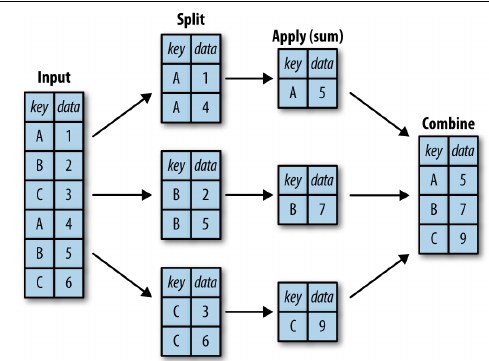

In [35]:
# Column indexing.
planets.groupby('method')['orbital_period'].std()

method
Astrometry                          544.217663
Eclipse Timing Variations          2499.130945
Imaging                          213978.177277
Microlensing                       1113.166333
Orbital Brightness Modulation         0.725493
Pulsar Timing                     16313.265573
Pulsation Timing Variations                NaN
Radial Velocity                    1454.926210
Transit                              46.185893
Transit Timing Variations            71.599884
Name: orbital_period, dtype: float64

In [22]:
# Iteration over groups
for (method,group) in planets.groupby('method'):
    print(f'{method}: {group.shape}')

Astrometry: (2, 6)
Eclipse Timing Variations: (9, 6)
Imaging: (38, 6)
Microlensing: (23, 6)
Orbital Brightness Modulation: (3, 6)
Pulsar Timing: (5, 6)
Pulsation Timing Variations: (1, 6)
Radial Velocity: (553, 6)
Transit: (397, 6)
Transit Timing Variations: (4, 6)


In [26]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### Aggregate, filter, transform, apply

In [29]:
# Aggregation
# aggregate function is more flexible 
planets.groupby('method').aggregate(['min',np.median,max])

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1      1   1     246.360000    631.180000   
Eclipse Timing Variations          1      2   2    1916.250000   4343.500000   
Imaging                            1      1   4    4639.150000  27500.000000   
Microlensing                       1      1   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1      2   2       0.240104      0.342887   
Pulsar Timing                      1      3   3       0.090706     66.541900   
Pulsation Timing Variations        1      1   1    1170.000000   1170.000000   
Radial Velocity                    1      1   6       0.736540    360.200000   
Transit                            1      1   7       0.355000      5.714932   
Transit Timing Variations          2      2   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

In [31]:
# we can also specify certain column to
planets.fillna(value=0).groupby('method')['mass'].aggregate(['min',np.median,max])

,min,median,max
method,,,
Astrometry,0.0,0.000,0.00
Eclipse Timing Variations,0.0,0.000,6.05
Imaging,0.0,0.000,0.00
Microlensing,0.0,0.000,0.00
Orbital Brightness Modulation,0.0,0.000,0.00
Pulsar Timing,0.0,0.000,0.00
Pulsation Timing Variations,0.0,0.000,0.00
Radial Velocity,0.0,1.059,25.00
Transit,0.0,0.000,1.47


In [42]:
# Filtering.
def filter_func(x):
    return x['orbital_period'].std() > 10000
planets.fillna(value=0).groupby('method').filter(filter_func)

,method,number,orbital_period,mass,distance,year
29,Imaging,1,0.000000,0.0,45.52,2005
30,Imaging,1,0.000000,0.0,165.00,2007
31,Imaging,1,0.000000,0.0,140.00,2004
33,Imaging,1,0.000000,0.0,0.00,2008
34,Imaging,1,0.000000,0.0,145.00,2013
35,Imaging,1,0.000000,0.0,139.00,2004
36,Imaging,1,0.000000,0.0,18.39,2006
47,Imaging,1,6000.000000,0.0,19.28,2008
54,Imaging,1,0.000000,0.0,52.03,2012
68,Imaging,1,318280.000000,0.0,7.69,2008


In [43]:
# Transformation.
planets.groupby('method').transform(lambda x: x- x.mean())

,number,orbital_period,mass,distance,year
0,-0.721519,-554.054680,4.469301,25.799792,-1.518987
1,-0.721519,51.419320,-0.420699,5.349792,0.481013
2,-0.721519,-60.354680,-0.030699,-31.760208,3.481013
3,-0.721519,-497.324680,16.769301,59.019792,-0.518987
4,-0.721519,-307.134680,7.869301,67.869792,1.481013
...,...,...,...,...,...
1030,-0.954660,-17.160566,NaN,-427.298080,-5.236776
1031,-0.954660,-18.486209,NaN,-451.298080,-4.236776
1032,-0.954660,-17.910549,NaN,-425.298080,-4.236776
1033,-0.954660,-16.976990,NaN,-306.298080,-3.236776


In [44]:
def norm_by_data2(x):
# x is a DataFrame of group values
    x['mass'] /= x['mass'].sum()
    return x
planets.groupby('method').apply(norm_by_data2)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,0.005292,77.40,2006
1,Radial Velocity,1,874.774000,0.001647,56.95,2008
2,Radial Velocity,1,763.000000,0.001938,19.84,2011
3,Radial Velocity,1,326.030000,0.014460,110.62,2007
4,Radial Velocity,1,516.220000,0.007826,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [45]:
# it is not necessary that key should always be a columns of that dataframe,
# it can be any other series with same length as dataframe
# so we can also perform this
planets.groupby(planets['method']).sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,0.00000,2166.91,76347
Microlensing,27,2.207500e+04,0.00000,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2360.00,6035
Pulsar Timing,11,3.671511e+04,0.00000,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,0.00,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [46]:
# A dictionary or series mapping index to group
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])

In [47]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,19
vowel,3,8


In [48]:
#  Similar to mapping, you can pass any Python function that will input the index value and output the group
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [49]:
df2.groupby([str.lower, mapping]).mean()


,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Grouping example


In [55]:
planets.groupby(['method','year'])['mass'].median().unstack().fillna(0)

year,1989,1992,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
method,,,,,,,,,,,,,,,,,,,,,
Astrometry,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,0.00,0.0,0.00,0.00,0.000,0.00
Eclipse Timing Variations,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,6.05,0.0,0.00,4.20,0.000,0.00
Imaging,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,0.00,0.0,0.00,0.00,0.000,0.00
Microlensing,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,0.00,0.0,0.00,0.00,0.000,0.00
Orbital Brightness Modulation,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,0.00,0.0,0.00,0.00,0.000,0.00
Pulsar Timing,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,0.00,0.0,0.00,0.00,0.000,0.00
Pulsation Timing Variations,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,0.00,0.0,0.00,0.00,0.000,0.00
Radial Velocity,11.68,0.0,0.0,0.472,1.665,1.04,1.39,1.9855,1.415,2.07,...,0.561,0.9435,2.215,1.99,1.78,0.6,0.12,2.37,0.865,0.48
Transit,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.0000,0.000,0.00,...,0.000,0.0000,0.000,0.00,0.00,0.0,0.00,0.00,1.470,0.00


In [52]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Table
A pivot table is a similar operation that is commonly seen in spreadsheets and
other programs that operate on tabular data. The pivot table takes simple column-
wise data as input, and groups the entries into a two-dimensional table that provides
a multidimensional summarization of the data.pivot tables are
essentially a multidimensional version of GroupBy aggregation

In [56]:
titanic = sns.load_dataset('titanic')

In [57]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [59]:
# same operation using pivot table
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [63]:
# Multilevel pivot table
# binning column age
# values in cells are mean
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [64]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [65]:
#  aggfunc keyword controls what type of aggregation is applied
titanic.pivot_table(index='sex', columns='class',aggfunc={'survived':sum, 'fare':'mean'})



fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [66]:
# At times it’s useful to compute totals along each grouping. This can be done via the margins keyword
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Example: Birthrate Data

In [67]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   182k      0  0:00:01  0:00:01 --:--:--  182k


In [2]:
births = pd.read_csv('births.csv')

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births',index='decade',columns = 'gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

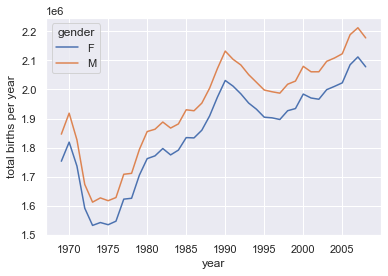

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
births.pivot_table('births',index='year',columns = 'gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

In [7]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [8]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [9]:
births['day'] = births['day'].astype(int)

In [11]:
births.index = pd.to_datetime(10000 * births.year + 100*births.month + births.day,format='%Y%m%d')

In [12]:
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


<ipython-input-14-7645b85d9334>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])


Text(0, 0.5, 'mean births by day')

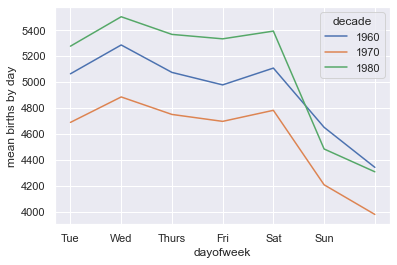

In [14]:
births.pivot_table('births', index='dayofweek',columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean births by day')

In [17]:
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.head()


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [18]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index] 
births_by_date.head()


<ipython-input-18-37c5db93b422>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


# Vectorized String Operations


We can perform vectorized operation numpy, and that makes code so easy, we can apply a single function to all elements whitout looping, but we were not able to apply functions on strings. Pandas gives us facility to manipulate strings in vectorized form 

In [2]:
data = ['paul','riya','jane','hog']
names = pd.Series(data)
names

0    paul
1    riya
2    jane
3     hog
dtype: object

In [3]:
names.str.capitalize()

0    Paul
1    Riya
2    Jane
3     Hog
dtype: object

Other methods similar to python string methods in pandas are: <br> <br>
len()
 lower()
 translate()
 islower()
ljust()
 upper()
 startswith() isupper()
rjust()
 find()
 endswith()
 isnumeric()
center() rfind()
 isalnum()
 isdecimal()
zfill()
 index()
 isalpha()
 split()
strip()
 rindex()
 isdigit()
 rsplit()
rstrip() capitalize() isspace()
 partition()
lstrip() swapcase()
 istitle()
 rpartition()


In [4]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam','Eric Idle', 'Terry Jones', 'Michael Palin'])


In [6]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [7]:
monte.str.startswith('J')

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [8]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

**We can also use regular expressions methods on pandas**
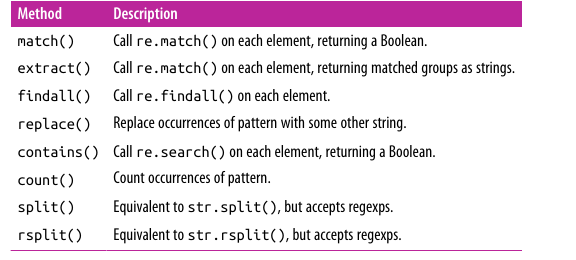

In [9]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [10]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [11]:
# we can also slice data
monte.str[:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [12]:
# or we can get a particular index value using get()
monte.str.get(4)

0    a
1     
2    y
3     
4    y
5    a
dtype: object

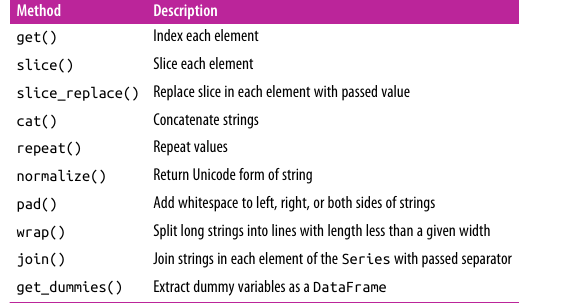

In [14]:
# The get_dummies() routine lets you quickly split out these indicator variables into a DataFrame:

full_monte = pd.DataFrame({'name': monte,'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C','B|C|D']})
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## Example: Recipe Database

In [16]:
# !curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
# !gunzip recipeitems-latest.json.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    20  100    20    0     0     40      0 --:--:-- --:--:-- --:--:--    40


In [20]:
 # read the entire file into a Python array
with open('recipeitems-latest.json', 'r') as f:
# Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [21]:
recipes.shape

(0, 0)

# Working with Time Series

### Native Python dates and times: datetime and dateutil


In [2]:
from datetime import datetime
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
from dateutil import parser
date = parser.parse("18th of July, 2021")
date

datetime.datetime(2021, 7, 18, 0, 0)

In [5]:
date.strftime('%A')

'Sunday'

### NumPy’s datetime64


In [6]:
date = np.array('2021-02-18',dtype = np.datetime64)
date

array('2021-02-18', dtype='datetime64[D]')

In [7]:
date + np.arange(12)

array(['2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
       '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
       '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01'],
      dtype='datetime64[D]')

In [8]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [9]:
np.datetime64('2017-07-11 12:00')

numpy.datetime64('2017-07-11T12:00')

In [10]:
np.datetime64('2017-07-11 12:00:59.00','ns')

numpy.datetime64('2017-07-11T12:00:59.000000000')

### Dates and times in Pandas
Timestamp object, which
combines the ease of use of datetime and dateutil with the efficient storage and
vectorized interface of numpy.datetime64

In [11]:
date = pd.to_datetime('24th of June, 2021')

In [12]:
date, date.strftime('%A')

(Timestamp('2021-06-24 00:00:00'), 'Thursday')

In [13]:
date + pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
               '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01',
               '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [14]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])

data = pd.Series([0,9,3,2],index=index)

In [15]:
data

2014-07-04    0
2014-08-04    9
2015-07-04    3
2015-08-04    2
dtype: int64

In [16]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    9
2015-07-04    3
dtype: int64

In [21]:
data['2014']

2014-07-04    0
2014-08-04    9
dtype: int64

In [22]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [23]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [25]:
dates-dates[4]

TimedeltaIndex(['-5 days', '-4 days', '-2 days', '-1 days', '0 days'], dtype='timedelta64[ns]', freq=None)

In [31]:
dates.to_period('D') + 1 # Note that you cannot perform addition operation on DatetimeIndex

PeriodIndex(['2015-07-04', '2015-07-05', '2015-07-07', '2015-07-08',
             '2015-07-09'],
            dtype='period[D]', freq='D')

### Regular sequences: pd.date_range()

In [32]:
# For DatetimeIndex
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range('2017-09-01',periods=10)

DatetimeIndex(['2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10'],
              dtype='datetime64[ns]', freq='D')

In [34]:
pd.date_range('2017-09-11',periods=10,freq='H')

DatetimeIndex(['2017-09-11 00:00:00', '2017-09-11 01:00:00',
               '2017-09-11 02:00:00', '2017-09-11 03:00:00',
               '2017-09-11 04:00:00', '2017-09-11 05:00:00',
               '2017-09-11 06:00:00', '2017-09-11 07:00:00',
               '2017-09-11 08:00:00', '2017-09-11 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [47]:
# for PeriodIndex
pd.period_range('2021-9',periods=8,freq='W')

PeriodIndex(['2021-08-30/2021-09-05', '2021-09-06/2021-09-12',
             '2021-09-13/2021-09-19', '2021-09-20/2021-09-26',
             '2021-09-27/2021-10-03', '2021-10-04/2021-10-10',
             '2021-10-11/2021-10-17', '2021-10-18/2021-10-24'],
            dtype='period[W-SUN]', freq='W-SUN')

In [39]:
# for TimeDeltaIndex
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

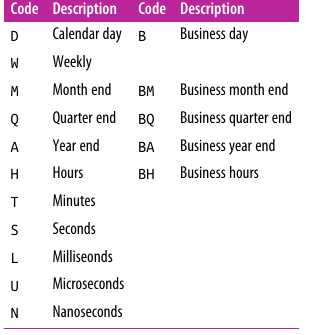

In [48]:
# For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:
pd.timedelta_range(0,periods=9,freq='2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [50]:
from pandas.tseries.offsets import BDay
pd.date_range('2020-02-18',periods=5,freq=BDay())

DatetimeIndex(['2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-24'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, and Windowing

In [4]:
from pandas_datareader import data

In [6]:
goog = data.DataReader('GOOG', start='2004', end='2016',data_source='yahoo')
goog.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [7]:
goog = goog['Close']

<AxesSubplot:xlabel='Date'>

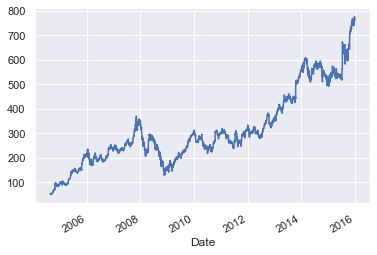

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
goog.plot()

### Resampling and converting frequencies


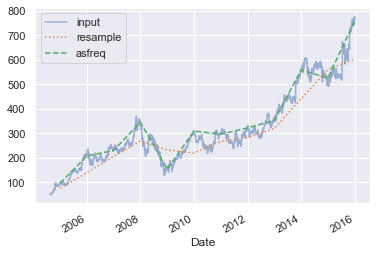

In [13]:
goog.plot(alpha=0.5,style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],loc='upper left')

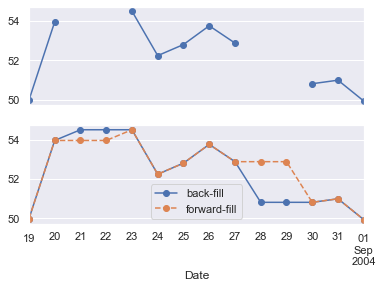

In [14]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time shifting

***Methods used for time shifts are shift() and tshift()***

<ipython-input-19-f88dbb77e708>:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


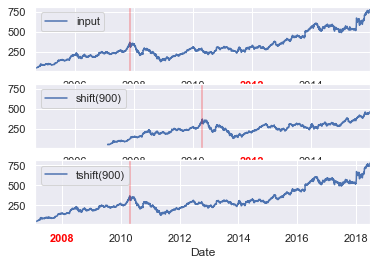

In [19]:
fig, ax = plt.subplots(3, sharey=True)

goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1]) #values are only shifted, as seen in graph 2
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

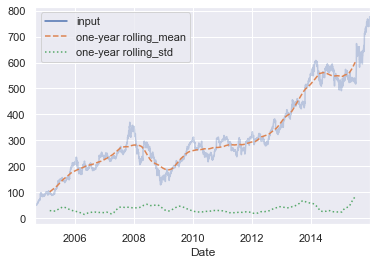

In [23]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
'one-year rolling_mean': rolling.mean(),
'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


# Example: Visualizing Seattle Bicycle Counts


In [24]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4315k    0 4315k    0     0   730k      0 --:--:--  0:00:05 --:--:-- 1015k


In [25]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [26]:
data.columns = ['Total','East','West']

In [27]:
data.isnull().sum()

Total    21
East     21
West     21
dtype: int64

In [28]:
data.dropna().describe()

,Total,East,West
count,138521.000000,138521.000000,138521.000000
mean,112.147025,51.104800,61.042225
std,142.887838,65.881672,88.902702
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


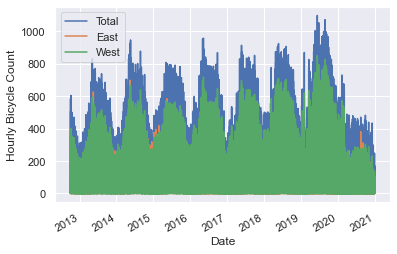

In [29]:
data.plot()
plt.ylabel('Hourly Bicycle Count');


Text(0, 0.5, 'Weekly bicycle count')

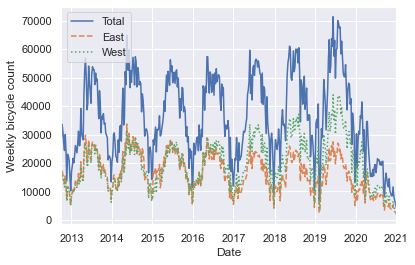

In [31]:
weekly = data.resample('W').sum()
weekly.plot(style=['-','--',':'])
plt.ylabel('Weekly bicycle count')

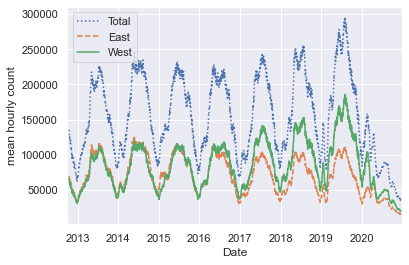

In [32]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');


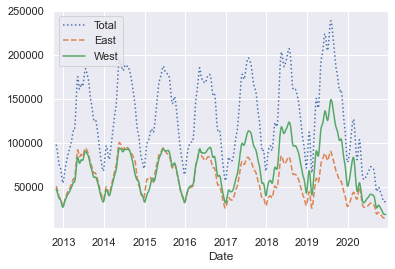

In [33]:
daily.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


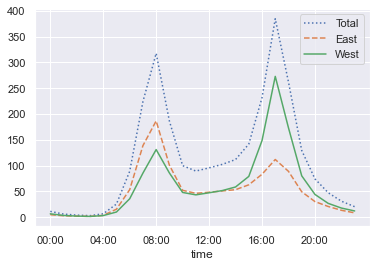

In [34]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

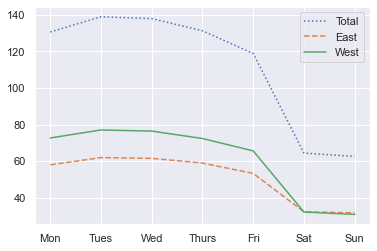

In [35]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);


In [36]:
#  a compound groupby and look at the hourly trend on weekdays versus weekends. 
#We’ll start by grouping by both a flag marking the weekend, and the time of day:

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()


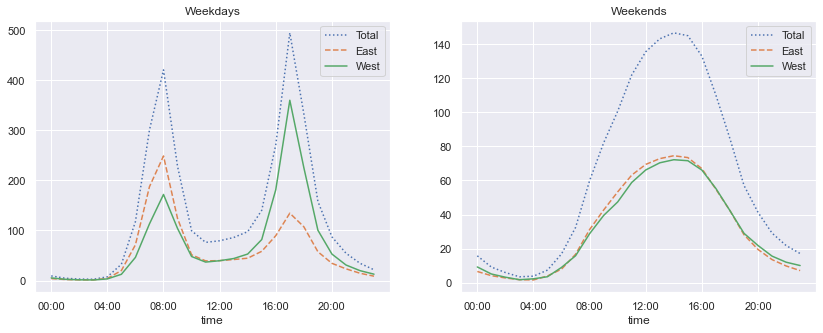

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',xticks=hourly_ticks, style=[':', '--', '-']);


# High-Performance Pandas: eval() and query()
### pandas.eval()

In [2]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))for i in range(4))


In [3]:
%timeit df1 + df2 + df3 + df4

214 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
# using eval() time reduced
%timeit pd.eval('df1 + df2 + df3 + df4')

78.3 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Operations supported by pd.eval()


In [5]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))for i in range(5))


In [6]:
# Arithmetic operators.

result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)


True

In [7]:
# Comparison operators

result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)


True

In [8]:
# Bitwise operators.
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [9]:
# Object attributes and indices
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)


True

In [10]:
# Column-Wise Operations
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [11]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)


True

In [12]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)


True

In [13]:
# Assignment in DataFrame.eval()
df.eval('D = (A + B) / C', inplace=True)
df.head()


,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [14]:
# Local variables in DataFrame.eval()
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

#### DataFrame.query() Method


In [15]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [16]:
result2 = df.query('A < 0.5 and B < 0.5')

np.allclose(result1,result2)

True

In [17]:
# using outside variable in query
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)


True